In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import and_, Date, Time, cast

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from today
# Perform a query to retrieve the data and precipitation scores
measure1 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016-08-23','2017-08-23')).all()
measure1

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
measurementpc_df=pd.DataFrame(measure1)
measurementpc_df.head(5)

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [12]:
# Sort the dataframe by date
measurementpc_df.set_index(measurementpc_df['date'], inplace=True)

<IPython.core.display.Javascript object>


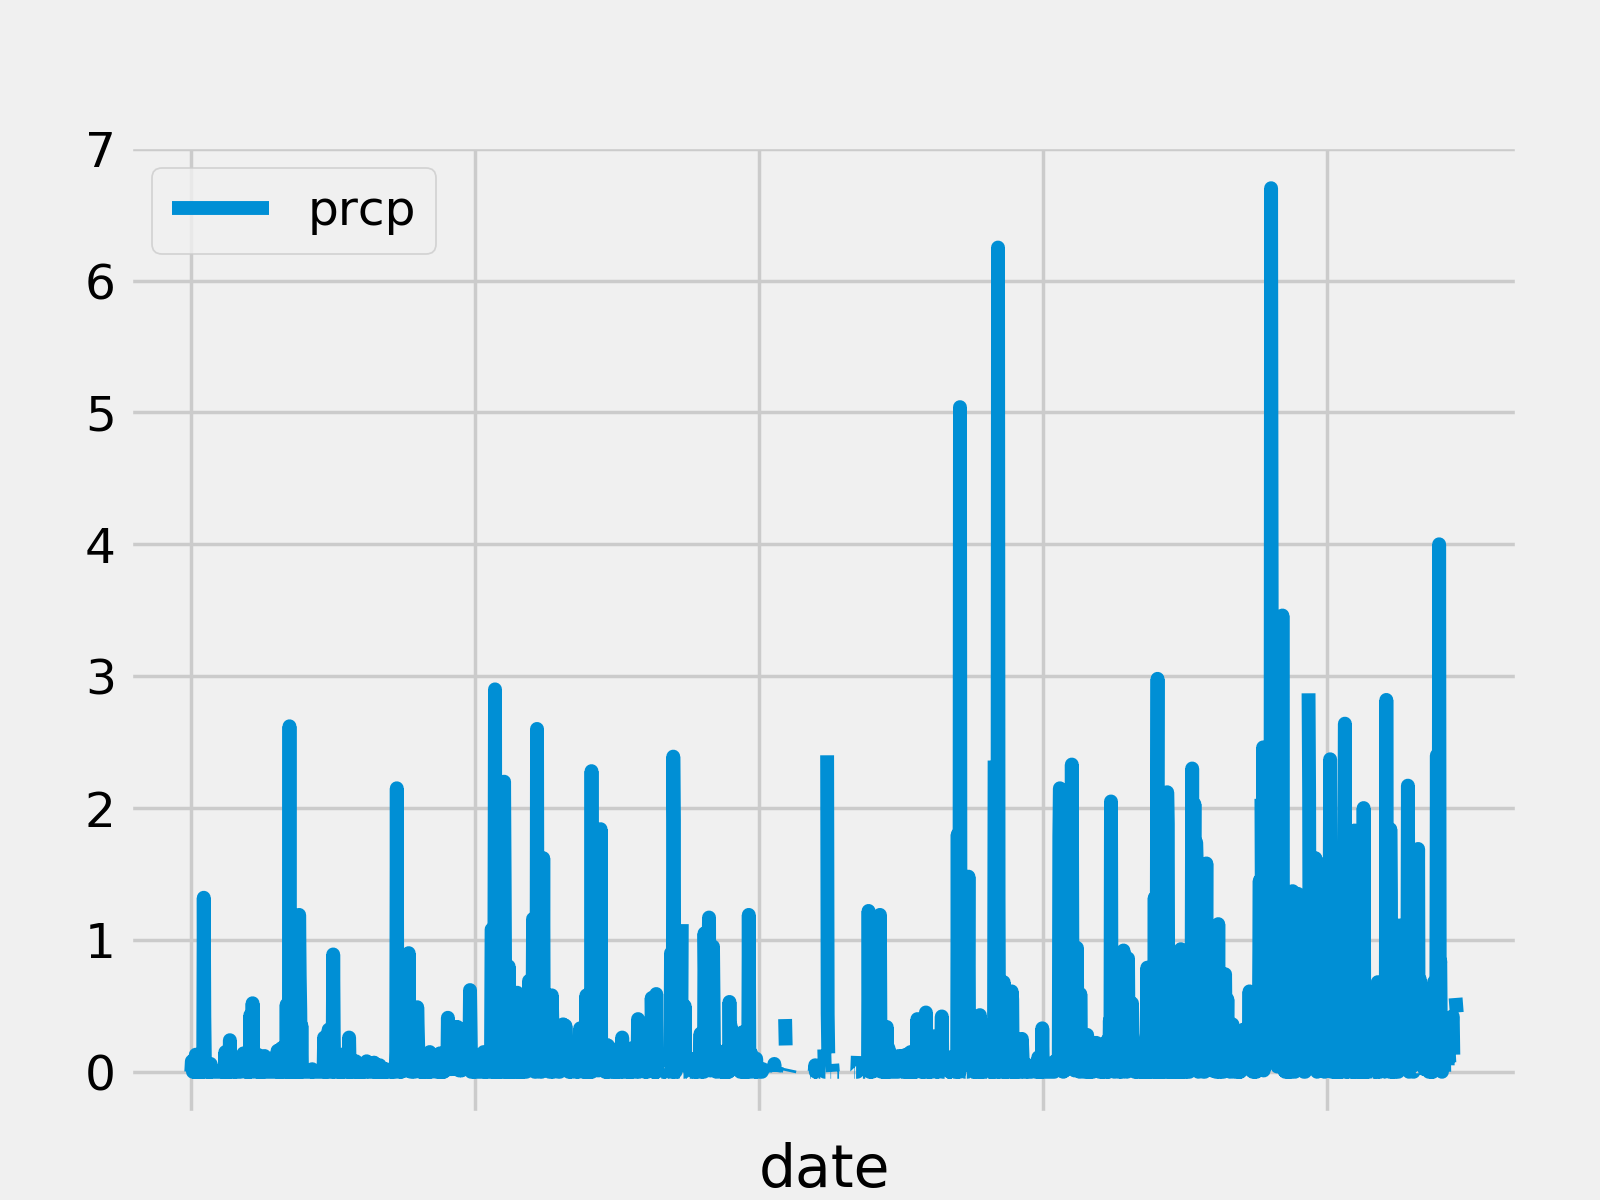

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates
measurementpc_df.plot()
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurementpc_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# How many stations are available in this dataset?
from sqlalchemy import func
rows = session.query(func.count(Station.id)).scalar()

rows

9

In [16]:
conn = engine.connect()
data = pd.read_sql("SELECT * FROM measurement", conn)
data.dtypes

id           int64
station     object
date        object
prcp       float64
tobs       float64
dtype: object

In [17]:
data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [18]:
a_stations = session.query(Measurement.station, Measurement.prcp).filter(Measurement.date.between('2016-08-23','2017-08-23')).all()
a_stations

[('USC00519397', 0.0),
 ('USC00519397', 0.08),
 ('USC00519397', 0.08),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.01),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.13),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.03),
 ('USC00519397', None),
 ('USC00519397', None),
 ('USC00519397', 0.05),
 ('USC00519397', 0.0),
 ('USC00519397', 0.03),
 ('USC00519397', 0.0),
 ('USC00519397', 0.05),
 ('USC00519397', 0.0),
 ('USC00519397', 0.02),
 ('USC00519397', 1.32),
 ('USC00519397', 0.42),
 ('USC00519397', 0.06),
 ('USC00519397', 0.05),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.02),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.06),
 ('USC00519397', 0.02),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397', 0.0),
 ('USC00519397',

In [19]:
# What are the most active stations?
# List the stations and the counts in descending order.
print(data['station'].value_counts()) 


USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64


In [20]:
#Station with the most observations 
most_obsv = session.query(Measurement.station, func.count(Measurement.station))\
  .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
    
print(most_obsv)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [21]:
a_stations = most_obsv[0][0] 
#a_stations = session.query(Measurement.station, Measurement.prcp).filter(Measurement.date.between('2016-08-23','2017-08-23')).all()
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station == a_stations).all()



[(54.0, 85.0, 71.66378066378067)]

In [22]:
# Choose the station with the highest number of temperature observations
most_obsv = session.query(Measurement.station, Measurement.tobs)\
    .filter(Measurement.station == a_stations)\
    .filter(Measurement.date.between('2016-08-23','2017-08-23')).all()


In [23]:
# Query the last 12 months of temperature observation data for this station  
most_obsv_df = pd.DataFrame(most_obsv) 
most_obsv_df.set_index('station', inplace=True)
most_obsv_df.head()

,tobs
station,
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0


<IPython.core.display.Javascript object>


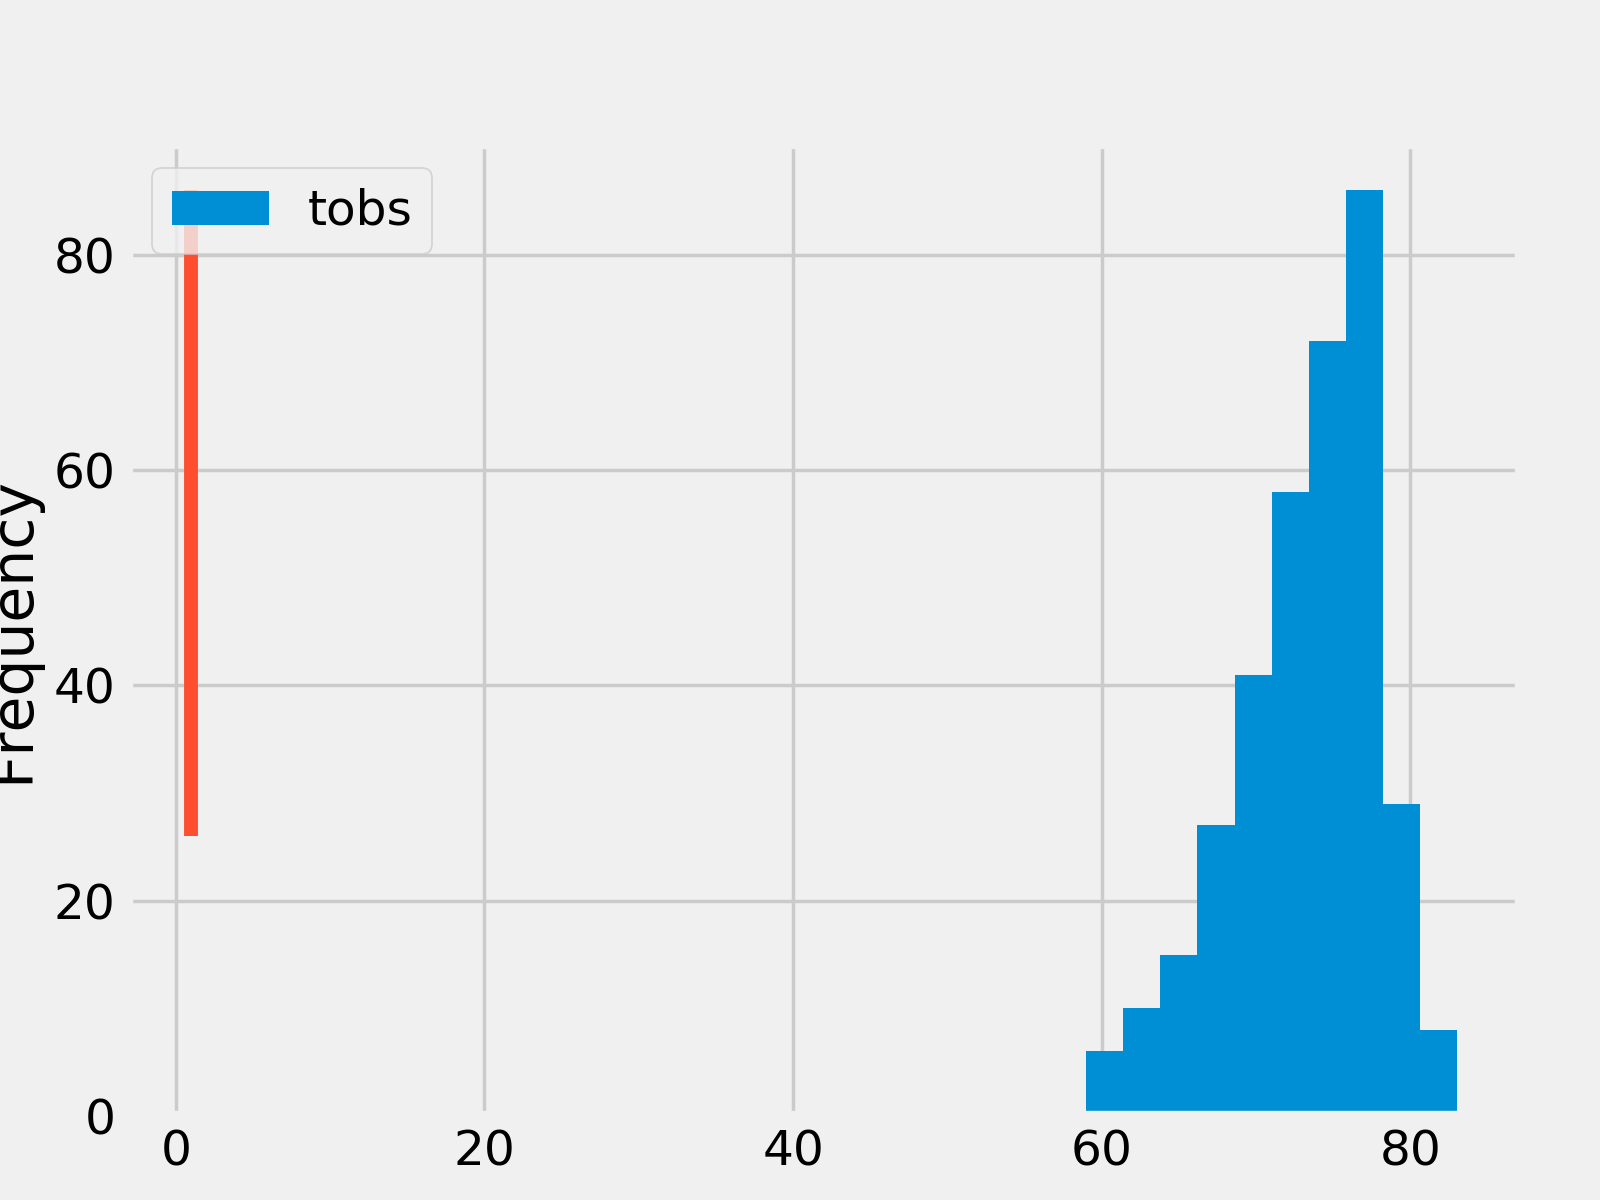

In [24]:
# plot the results as a histogram
most_obsv_df.plot.hist()
plt.show()


In [25]:
def calc_temps(start_date, end_date):\
return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs))\
     .filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()            
print(calc_temps('2016-08-23','2017-08-23'))

[(58.0, 74.59058295964125, 87.0)]


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):\
return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs))\
     .filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()            
print(calc_temps('2015-08-23','2016-08-23'))
trip_calc= calc_temps('2015-08-23','2016-08-23')

[(56.0, 74.45063829787235, 86.0)]


In [27]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
tripavg_df = pd.DataFrame(trip_calc, columns=['Min Temp', 'Avg Temp', 'Max Temp']) 
avgtemp = tripavg_df['Avg Temp']
temp_min_max = tripavg_df.iloc[0]['Max Temp'] - tripavg_df.iloc[0]['Min Temp']

#avgtemp.plot(kind='bar', yerr=temp_min_max, figsize(6,8), alpha=0.5, color='coral')
#avgtemp.plot(kind='bar', yerr=temp_min_max, alpha=0.5, color='coral')

#plt.title("Trip Avg Temp")
#plt.ylabel("Temp (F)")
#plt.xticks([])   
#plt.grid()
#plt.show()           

temp_min = tripavg_df.iloc[0]['Min Temp']
#fig, ax = plt.subplots()
#ax.bar(trip.index, trip.gas, yerr=trip.std)
plt.errorbar(1, temp_min, yerr=temp_min_max)


<ErrorbarContainer object of 3 artists>

<IPython.core.display.Javascript object>


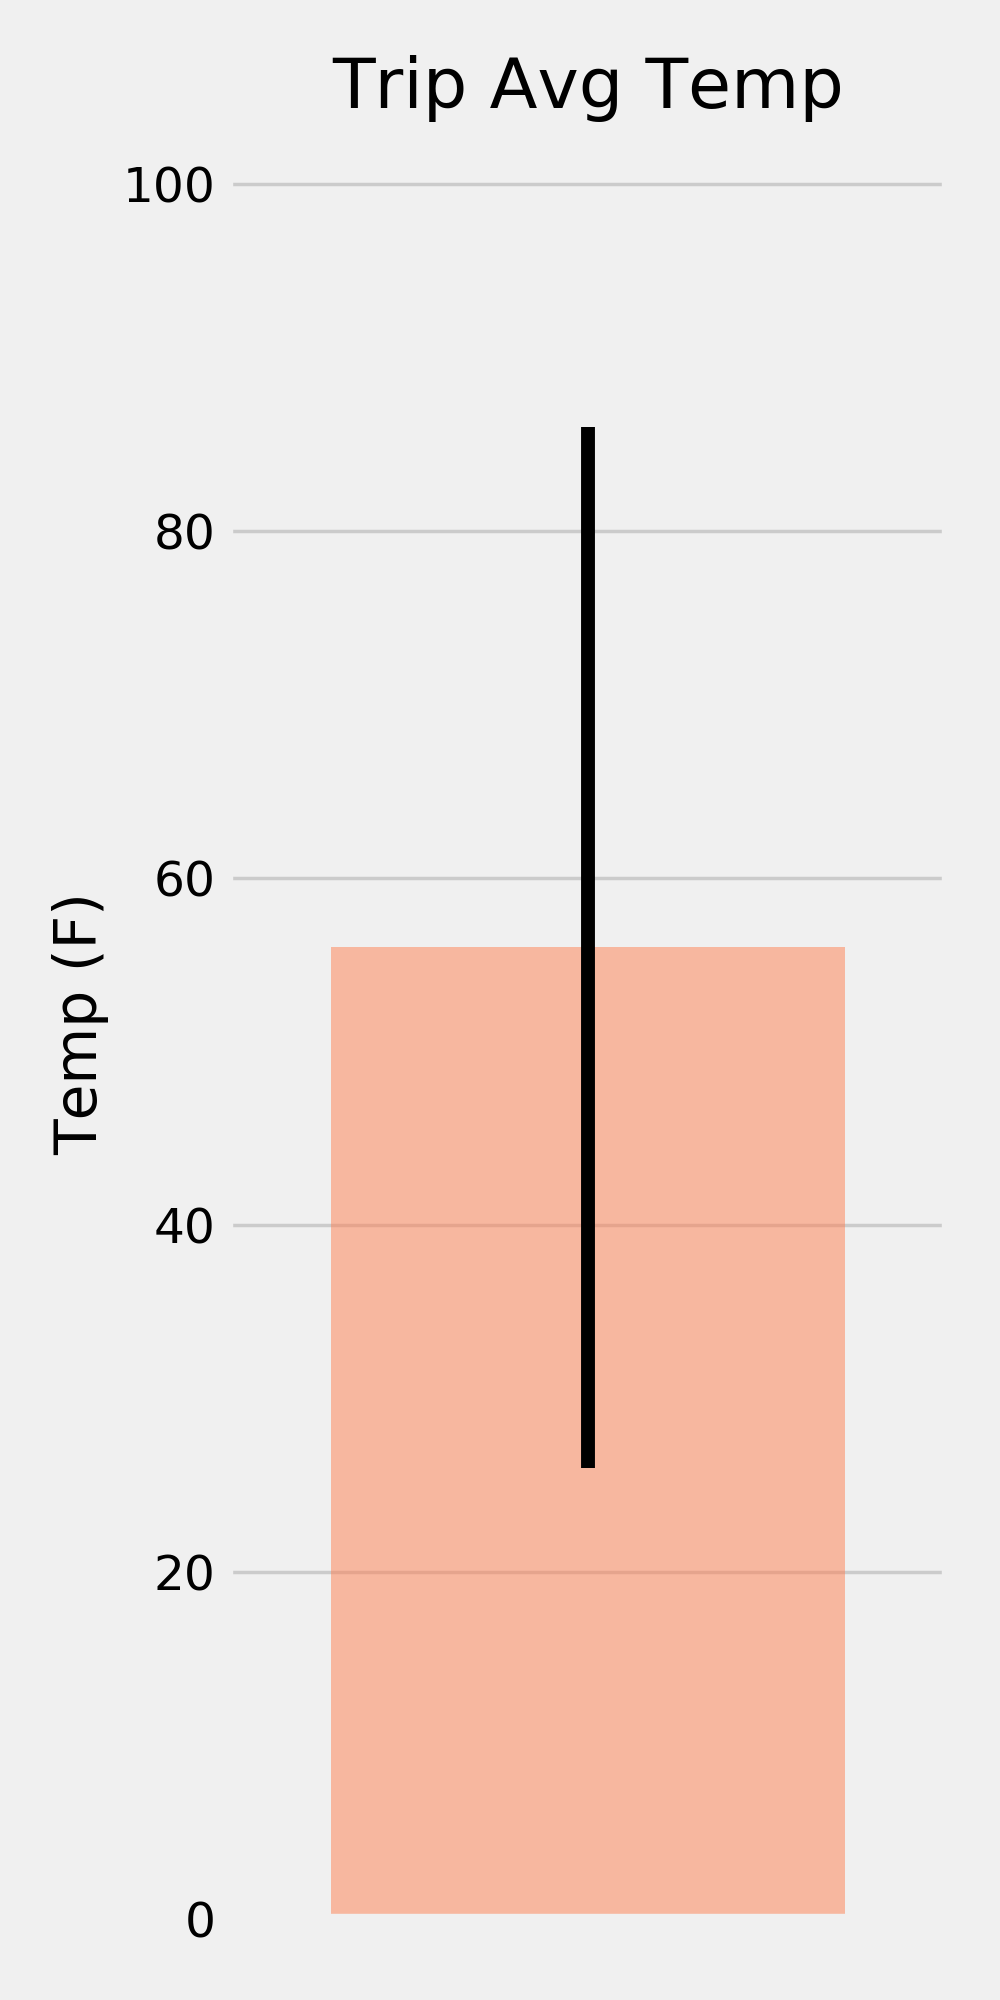

In [28]:
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
#yerr = tmax-tmin

bar = ax.bar(xpos, temp_min, yerr=temp_min_max, alpha=0.5, color='coral', align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.2, .2)

# fig.autofmt_xdate()
fig.tight_layout()
fig.show()

In [29]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
conn = engine.connect()
data_station = pd.read_sql("SELECT * FROM station", conn)
data_station.dtypes


id             int64
station       object
name          object
latitude     float64
longitude    float64
elevation    float64
dtype: object

In [30]:
conn = engine.connect()
data_measurement = pd.read_sql("SELECT * FROM measurement", conn)
data_measurement.dtypes


id           int64
station     object
date        object
prcp       float64
tobs       float64
dtype: object

In [31]:
#Combined

combined_data = pd.merge(data_station, data_measurement, on="station", how="inner")
combined_data.head()

,id_x,station,name,latitude,longitude,elevation,id_y,date,prcp,tobs
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,1,2010-01-01,0.08,65.0
1,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2,2010-01-02,0.00,63.0
2,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,3,2010-01-03,0.00,74.0
3,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,4,2010-01-04,0.00,76.0
4,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,5,2010-01-06,NaN,73.0


In [32]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

trip_rain = session.query(Measurement.station, Measurement.tobs)\
    .filter(Measurement.date.between('2016-08-23','2017-08-23')).order_by(Measurement.station == a_stations).all()
   

In [33]:
trip_rain = session.query(Measurement.station, Measurement.prcp, Measurement.tobs)\
    .filter(Measurement.date.between('2016-08-23','2017-08-23')).order_by(Measurement.station == a_stations).all()

In [34]:
trip_rain

[('USC00519397', 0.0, 81.0),
 ('USC00519397', 0.08, 79.0),
 ('USC00519397', 0.08, 80.0),
 ('USC00519397', 0.0, 79.0),
 ('USC00519397', 0.0, 77.0),
 ('USC00519397', 0.01, 78.0),
 ('USC00519397', 0.0, 78.0),
 ('USC00519397', 0.0, 79.0),
 ('USC00519397', 0.13, 80.0),
 ('USC00519397', 0.0, 81.0),
 ('USC00519397', 0.0, 80.0),
 ('USC00519397', 0.0, 79.0),
 ('USC00519397', 0.03, 75.0),
 ('USC00519397', None, 79.0),
 ('USC00519397', None, 76.0),
 ('USC00519397', 0.05, 76.0),
 ('USC00519397', 0.0, 80.0),
 ('USC00519397', 0.03, 79.0),
 ('USC00519397', 0.0, 78.0),
 ('USC00519397', 0.05, 76.0),
 ('USC00519397', 0.0, 78.0),
 ('USC00519397', 0.02, 78.0),
 ('USC00519397', 1.32, 75.0),
 ('USC00519397', 0.42, 79.0),
 ('USC00519397', 0.06, 80.0),
 ('USC00519397', 0.05, 79.0),
 ('USC00519397', 0.0, 81.0),
 ('USC00519397', 0.0, 77.0),
 ('USC00519397', 0.0, 77.0),
 ('USC00519397', 0.0, 78.0),
 ('USC00519397', 0.02, 76.0),
 ('USC00519397', 0.0, 82.0),
 ('USC00519397', 0.0, 81.0),
 ('USC00519397', 0.0, 78.0)

In [ ]:
##rainfall per station
#most_obsv = session.query(Measurement.station, func.count(Measurement.station))\
#  .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
    
#print(most_obsv)
#print(data['station'].value_counts()) 

In [35]:
# Query the last 12 months of temperature observation data for this station  
trip_rain_df = pd.DataFrame(trip_rain) 
station_rain = pd.pivot_table(trip_rain_df,index=['station'],values=['prcp'],aggfunc=np.sum)
station_rain

,prcp
station,
USC00513117,48.51
USC00514830,33.24
USC00516128,147.81
USC00517948,4.59
USC00519281,70.03
USC00519397,16.09
USC00519523,38.01


In [37]:
start_date = '2016-08-23'
end_date = '2017-08-23'

sel = [Station.station, Station.name, Station.latitude, 
       Station.longitude, Station.elevation, func.sum(Measurement.prcp)]

results = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
print(results)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 147.81000000000006), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 70.03000000000003), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 48.510000000000026), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 38.01), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 33.239999999999995), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 16.089999999999986), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 4.59)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


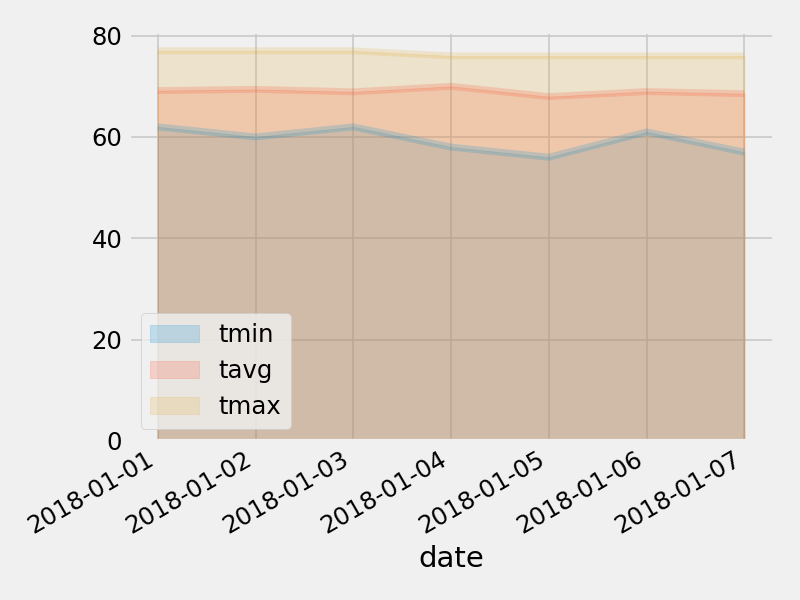

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
